In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay,calibration_curve
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns

/Users/natalie/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
with open(f"/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/nothing_model_after_tune.pkl", "rb") as f:
    nothing_loadded = pickle.load(f)
with open(f"/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/smote_model_after_tune.pkl", "rb") as f:
    smote_loadded = pickle.load(f)
with open(f"/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/class_weight_model_after_tune.pkl", "rb") as f:
    class_weight_loadded = pickle.load(f)
with open(f"/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/under_sampling_model_after_tune.pkl", "rb") as f:
    under_sampling_loadded = pickle.load(f)
with open("/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/nothing_ensemble_after_tune.pkl", "rb") as f:
    nothing_ensemble_loadded = pickle.load(f)
with open("/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/smote_ensemble_after_tune.pkl", "rb") as f:
    smote_ensemble_loadded = pickle.load(f)
with open("/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/under_sampling_ensemble_after_tune.pkl", "rb") as f:
    under_sampling_ensemble_loadded = pickle.load(f)
test = pd.read_parquet("/Users/natalie/Desktop/DS Thesis/Code/data/test.parquet")
train = pd.read_parquet("/Users/natalie/Desktop/DS Thesis/Code/data/train.parquet")

In [3]:
# drop column province
test = test.drop(columns=['province'])
train = train.drop(columns=['province'])

In [4]:
MODEL_NAMES = ['lr', 'rf', 'lgb', 'xgb', 'mlp', 'blend', 'stack']
nothing_score_df = nothing_loadded['score_df']
nothing_oofs = nothing_loadded['oofs']
nothing_models = nothing_loadded['models']
nothing_predictions = nothing_loadded['predictions']

smote_score_df = smote_loadded['score_df']
smote_oofs = smote_loadded['oofs']
smote_models = smote_loadded['models']
smote_predictions = smote_loadded['predictions']

class_weight_score_df = class_weight_loadded['score_df']
class_weight_oofs = class_weight_loadded['oofs']
class_weight_df_models = class_weight_loadded['models']
class_weight_predictions = class_weight_loadded['predictions']

under_sampling_score_df = under_sampling_loadded['score_df']
under_sampling_oofs = under_sampling_loadded['oofs']
under_sampling_models = under_sampling_loadded['models']
under_sampling_predictions = under_sampling_loadded['predictions']


nothing_ensemble_score_df = nothing_ensemble_loadded['score_df']
nothing_ensemble_predictions = nothing_ensemble_loadded['predictions']

smote_ensemble_score_df = smote_ensemble_loadded['score_df']
smote_ensemble_predictions = smote_ensemble_loadded['predictions']

under_sampling_ensemble_score_df = under_sampling_ensemble_loadded['score_df']
under_sampling_ensemble_predictions = under_sampling_ensemble_loadded['predictions']

In [5]:
def plot_calibration_curve(y_true, predictions,title):
    n = 5
    if 'class' in title:
        n=4
    font = {'size'   : 14}
    matplotlib.rc('font', **font)
    fraction_of_positive = []
    mean_predictive_probability = []
    models_v = []
    fig, axes = plt.subplots(2,1, figsize=(10,10))
    for i, name in enumerate(MODEL_NAMES[:n]):
        prob_true, prob_pred = calibration_curve(y_true, predictions[i], n_bins=10)
        fraction_of_positive.extend(prob_true)
        mean_predictive_probability.extend(prob_pred)
        models_v.extend([name]*len(prob_true))
    curve = pd.DataFrame({"fraction_of_positive":fraction_of_positive, "mean_predictive_probability":mean_predictive_probability, 'model_name':models_v})
    plt.figure(figsize=(10,7))
    axes[0].plot([0, 1], [0, 1], linestyle='--', color='black')
    sns.lineplot(x='mean_predictive_probability',y='fraction_of_positive',hue='model_name', style='model_name', data=curve, markers=True, lw=2, ax=axes[0])
    axes[0].set_title(f"Calibration curve - {title}")
    axes[0].set_xlabel("")
    for i, name in enumerate(MODEL_NAMES[:n]):
        sns.histplot(predictions[i],bins=10, element="step",fill=False, label=name,ax=axes[1])
    axes[1].legend(MODEL_NAMES[:5])
    axes[1].set_xlabel("mean predictive value")
    return fig

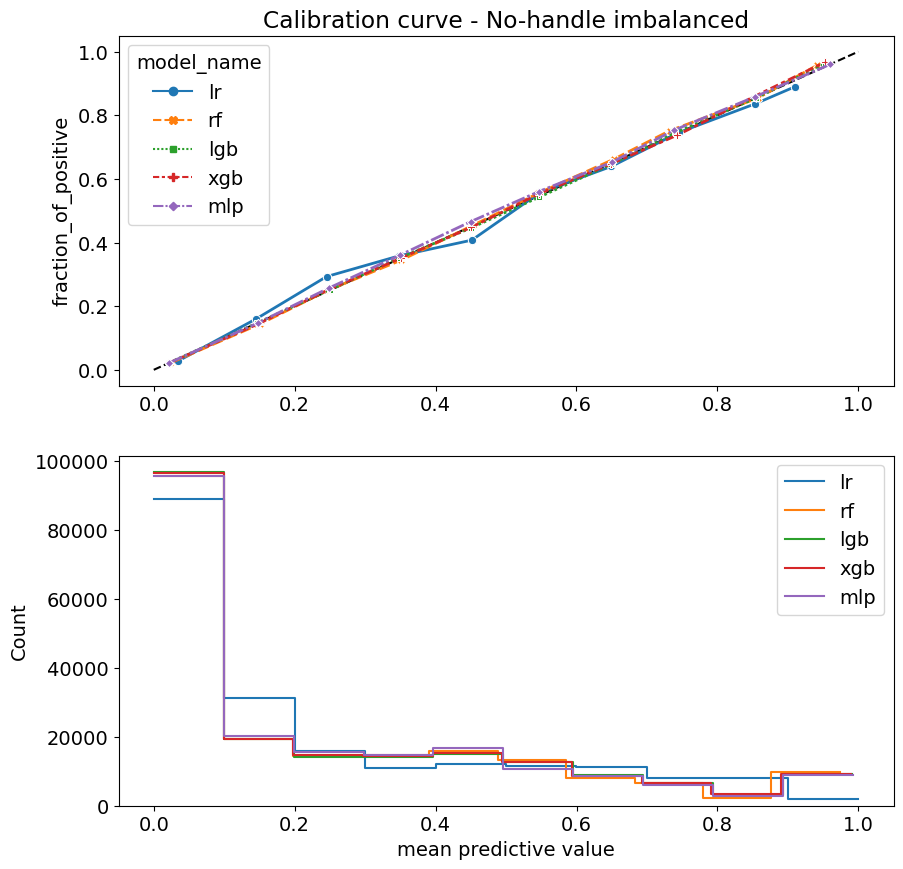

<Figure size 1000x700 with 0 Axes>

In [6]:
nothing_fig = plot_calibration_curve(test['churn_user'], nothing_predictions, 'No-handle imbalanced')

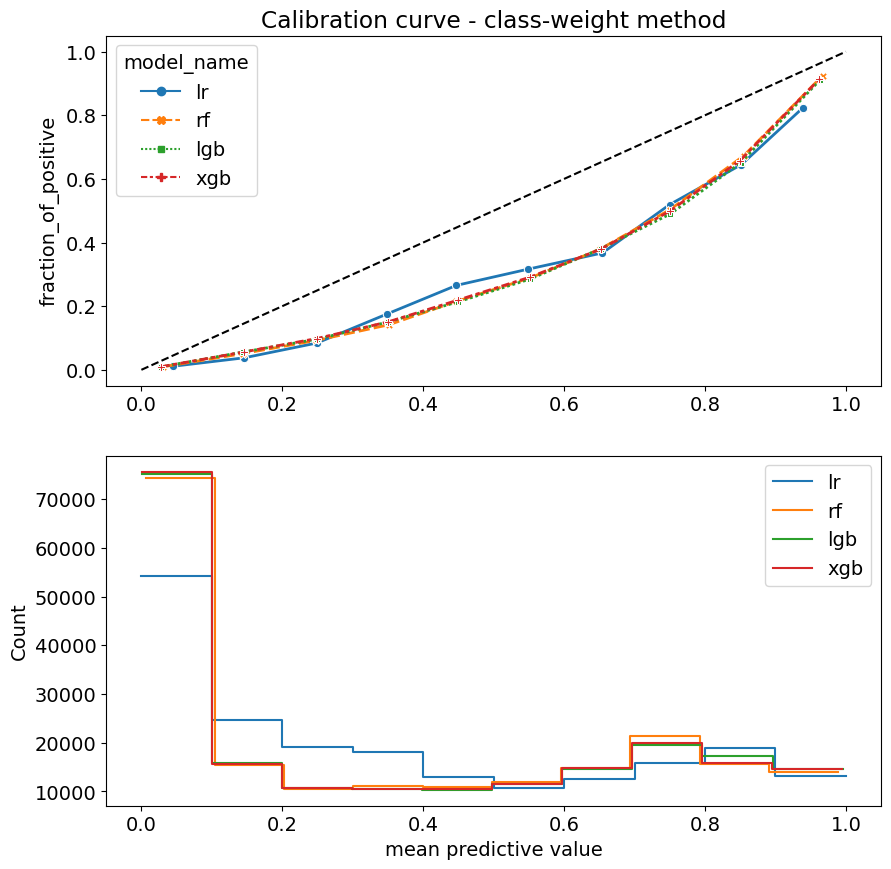

<Figure size 1000x700 with 0 Axes>

In [7]:
class_weight_fig = plot_calibration_curve(test['churn_user'], class_weight_predictions, 'class-weight method')

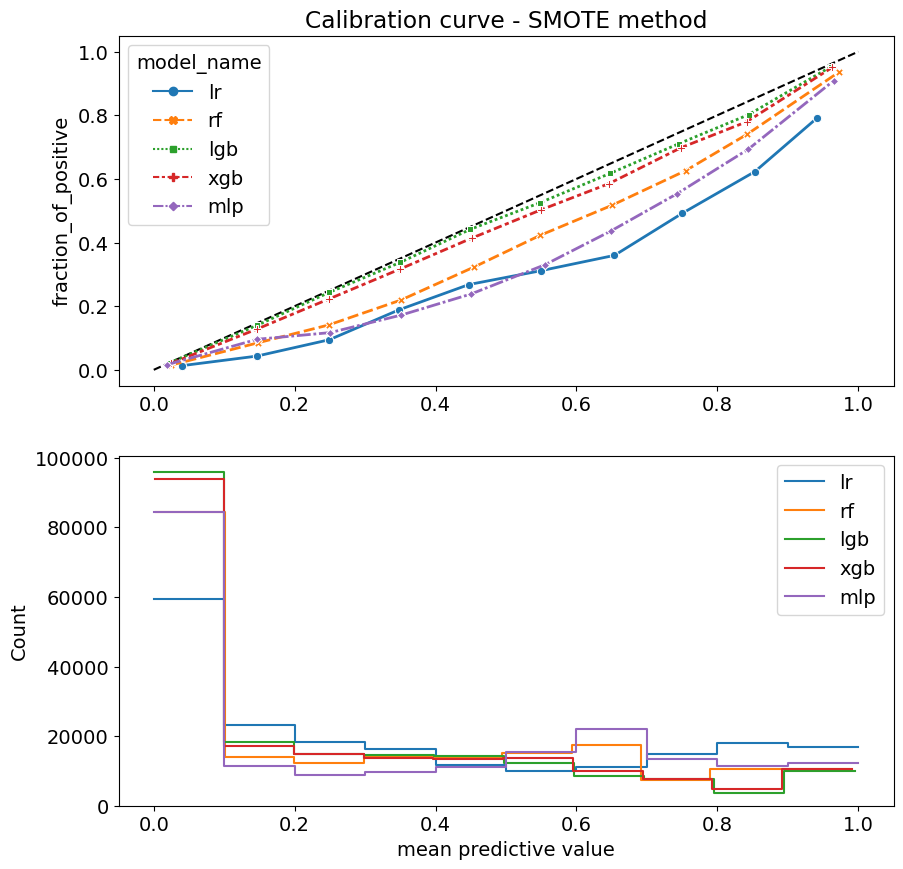

<Figure size 1000x700 with 0 Axes>

In [8]:
smote_fig = plot_calibration_curve(test['churn_user'], smote_predictions, 'SMOTE method')

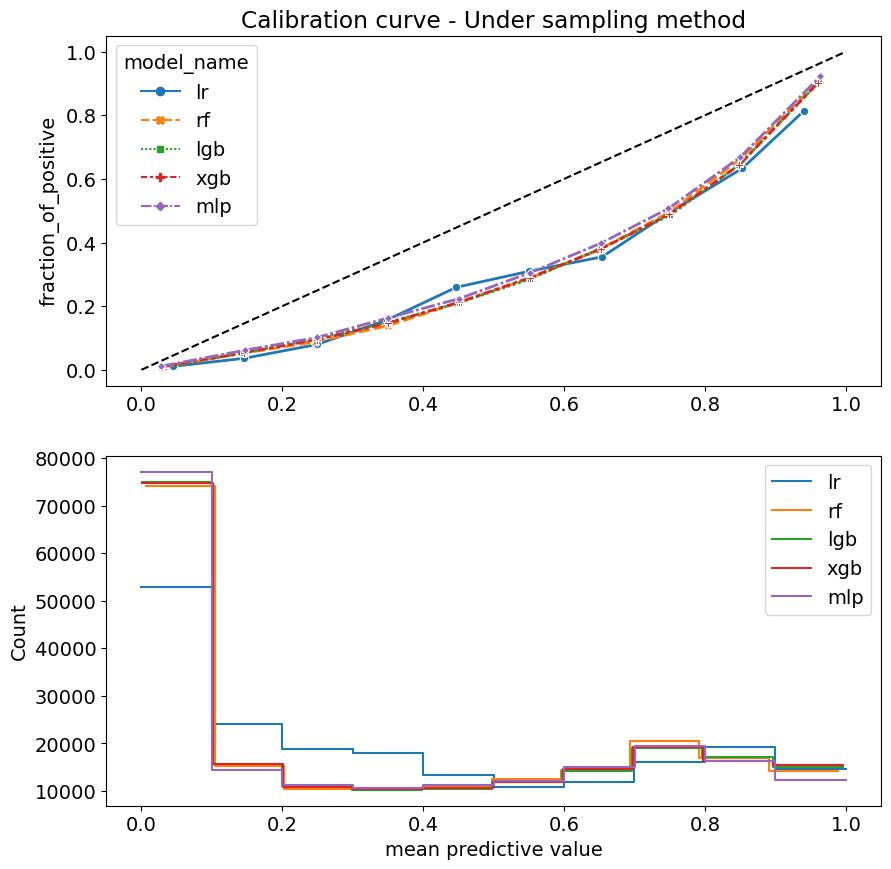

<Figure size 1000x700 with 0 Axes>

In [9]:
under_sampling_fig = plot_calibration_curve(test['churn_user'], under_sampling_predictions, 'Under sampling method')